In [2]:
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt

In [373]:
# Train, test, and cache the basic classifier for Obfuscation HW
import pandas
import sklearn
import argparse
from sklearn.metrics import accuracy_score
from nltk import tokenize
import pickle

def get_preds(cache_name, test):
    m,v = pickle.load(open(cache_name, 'rb'))
    test = [" ".join(tokenize.word_tokenize(t)) for t in test]
    test_data_features = v.transform(test)
    preds = m.predict(test_data_features)
    return preds

# Testing with the original dataset

In [445]:
test_data = pandas.read_csv('/Users/nehakardam/Documents/UWclasses /CSE NLP/A5/dataset.csv')

cache_name = 'gender_classifier.pickle'
test_preds = get_preds(cache_name, list(test_data["post_text"]))
gold_test = list(test_data["op_gender"])
gaccuracy0 = accuracy_score(list(test_preds), gold_test)
print("Gender classification accuracy", accuracy_score(list(test_preds), gold_test))

cache_name = 'subreddit_classifier.pickle'
test_preds = get_preds(cache_name, list(test_data["post_text"]))
gold_test = list(test_data["subreddit"])
saccuracy0 = accuracy_score(list(test_preds), gold_test)
print("Subreddit accuracy", accuracy_score(list(test_preds), gold_test))

Gender classification accuracy 0.6495


/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator CountVectorizer from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Subreddit accuracy 0.8585


In [3]:
#Male and female word test
# male =open(r'/Users/nehakardam/Documents/UWclasses /CSE NLP/A5/male.txt', encoding='utf8')
# female = open(r'/Users/nehakardam/Documents/UWclasses /CSE NLP/A5/female.txt', encoding='utf8')

male = pd.read_csv (r'/Users/nehakardam/Documents/UWclasses /CSE NLP/A5/male.txt', sep='delimiter', header=None)
male.to_csv (r'/Users/nehakardam/Documents/UWclasses /CSE NLP/A5/male.csv', index=None)
female = pd.read_csv (r'/Users/nehakardam/Documents/UWclasses /CSE NLP/A5/female.txt', sep='delimiter', header=None)
female.to_csv (r'/Users/nehakardam/Documents/UWclasses /CSE NLP/A5/female.csv', index=None)


#Main dataset from reddit post
df = pd.read_csv('/Users/nehakardam/Documents/UWclasses /CSE NLP/A5/dataset.csv')
df.head()

<ipython-input-3-b0b4f34e6690>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  male = pd.read_csv (r'/Users/nehakardam/Documents/UWclasses /CSE NLP/A5/male.txt', sep='delimiter', header=None)
<ipython-input-3-b0b4f34e6690>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  female = pd.read_csv (r'/Users/nehakardam/Documents/UWclasses /CSE NLP/A5/female.txt', sep='delimiter', header=None)


,Unnamed: 0,op_id,op_gender,post_id,post_text,subreddit,op_gender_visible
0,1200978,MexicanSpaceProgram,M,1200978,It really comes down to the circumstances unde...,relationships,False
1,747542,urmyheartBeatStopR,M,747542,"S.Korea, Japan, & China have tons of boy bands...",funny,False
2,721771,MadHatter69,M,721771,Those eyes.,funny,False
3,727114,on_the_redpill,M,727114,you need shades (Its not my fault if you keep...,funny,False
4,737662,oranjeeleven,M,737662,Nope.,funny,False


In [4]:
male

,0
0,wife
1,.
2,good
3,is
4,girlfriend
...,...
2995,thickness
2996,confidence
2997,captive
2998,powerful


# Model1
First, build a baseline obfuscation model:
For each post in dataset.csv, if the post was written by a man (“M”) and it contains words from
male.txt, replace these words with a random word from female.txt.
  Obfuscate posts written by women (“W”) in the same way (i.e., by replacing words from female.txt
with random words from male.txt).
  Test classify.py on your obfuscated data and report what happens to the two accuracy measurements
discussed above.

In [6]:
dict_male = {}
dict_female= {}
list_male = []
list_female = []
for index, value in male[0].items():
    dict_male[value] = "M"
    list_male.append(value)
for index, value in female[0].items():
    dict_female[value] = "F"
    list_female.append(value)

In [377]:
len(list_female)

3000

In [378]:
import random

def anonymize(words, gender):
    res = []
    if gender == "M":
        for word in words:
            if word in dict_male:
                r_index = random.randint(1, 3000) - 1
#                 print(list_female[r_index])
                res.append(list_female[r_index])
            else:
                res.append(word)
    else:
        for word in words:
            if word in dict_female:
                r_index = random.randint(1, 3000) - 1
#                 print(list_male[r_index])
                res.append(list_male[r_index])
            else:
                res.append(word)
                
#     print ("TESTING:", len(words), len(res))
    return res
            

df_copy = df.copy()
for i in range (df.shape[0]):
#     print("ORIGINAL: ", df_copy["post_text"][i])
#     print("ANONYMIZED: ", anonymize(df["post_text"][i], df["op_gender"][i]))
    df_copy["post_text"][i] = anonymize(df["post_text"][i], df["op_gender"][i])


<ipython-input-378-6926280320ab>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy["post_text"][i] = anonymize(df["post_text"][i], df["op_gender"][i])


In [379]:
df_copy.to_csv('/Users/nehakardam/Documents/UWclasses /CSE NLP/A5/dataset_a.csv')

In [435]:
test_data = pandas.read_csv('/Users/nehakardam/Documents/UWclasses /CSE NLP/A5/dataset_a.csv')

cache_name = 'gender_classifier.pickle'
test_preds = get_preds(cache_name, list(test_data["post_text"]))
gold_test = list(test_data["op_gender"])
gaccuracy1 = accuracy_score(list(test_preds), gold_test)
print("Gender classification accuracy", accuracy_score(list(test_preds), gold_test))

cache_name = 'subreddit_classifier.pickle'
test_preds = get_preds(cache_name, list(test_data["post_text"]))
gold_test = list(test_data["subreddit"])
saccuracy1 = accuracy_score(list(test_preds), gold_test)
print("Subreddit accuracy", accuracy_score(list(test_preds), gold_test))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator CountVectorizer from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Gender classification accuracy 0.289


/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator CountVectorizer from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Subreddit accuracy 0.517


# Model 2
Second, improve your obfuscation model:
  Instead of replacing words from male.txt with randomly chosen words from female.txt, choose
a semantically similar word from female.txt. Do the same in reverse. You may use any metric
you like for identifying semantically similar words, but you should explain why you chose it. We recommend
starting with cosine distance between pretrained word embeddings (available, for example,
here)
  Test classify.py on data obfuscated using your improved model and analyze the results. The
classifier should perform close to random at identifying gender and should obtain at least 79% accuracy
on classifying the subreddit.

In [382]:
import torchtext
import torch
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
from torchtext.vocab import Vectors
from tqdm.notebook import tqdm

# The first time you run this will download a ~823MB file
glove = torchtext.vocab.GloVe(name="6B", # trained on Wikipedia 2014 corpus
                              dim=100)    # embedding size = 50

In [385]:
import random

def closest_word_in_female(word):
    closest_word = ""
    min_distance = 100000
    for w in list_female:
        dis = torch.norm(glove[word] - glove[w])
        if(dis < min_distance):
            min_distance = dis
            closest_word = w
    return closest_word
        

def closest_word_in_male(word):
    closest_word = ""
    min_distance = 100000
    for w in list_male:
        dis = torch.norm(glove[word] - glove[w])
        if(dis < min_distance):
            min_distance = dis
            closest_word = w
    return closest_word

def anonymize2(words, gender):
    res = []
    if gender == "M":
        for word in words:
            if word in dict_male:
                res.append(closest_word_in_female(word))
            else:
                res.append(word)
    else:
        for word in words:
            if word in dict_female:
                res.append(closest_word_in_male(word))
            else:
                res.append(word)
                
    print ("TESTING:", len(words), len(res))
    return res


In [386]:
df_copy_model2 = df.copy()
for i in range (df.shape[0]):
#     print("ORIGINAL: ", df_copy["post_text"][i])
#     print("ANONYMIZED: ", anonymize(df["post_text"][i], df["op_gender"][i]))
    df_copy_model2["post_text"][i] = anonymize2(df["post_text"][i], df["op_gender"][i])

TESTING: 781 781


<ipython-input-386-d4e5cdd90ce5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_model2["post_text"][i] = anonymize2(df["post_text"][i], df["op_gender"][i])


TESTING: 221 221
TESTING: 11 11
TESTING: 70 70
TESTING: 6 6
TESTING: 84 84
TESTING: 578 578
TESTING: 89 89
TESTING: 135 135
TESTING: 201 201
TESTING: 91 91
TESTING: 110 110
TESTING: 106 106
TESTING: 99 99
TESTING: 192 192
TESTING: 62 62
TESTING: 34 34
TESTING: 32 32
TESTING: 25 25
TESTING: 1192 1192
TESTING: 72 72
TESTING: 25 25
TESTING: 99 99
TESTING: 96 96
TESTING: 36 36
TESTING: 53 53
TESTING: 35 35
TESTING: 832 832
TESTING: 45 45
TESTING: 30 30
TESTING: 60 60
TESTING: 20 20
TESTING: 512 512
TESTING: 67 67
TESTING: 101 101
TESTING: 632 632
TESTING: 145 145
TESTING: 22 22
TESTING: 12 12
TESTING: 169 169
TESTING: 414 414
TESTING: 104 104
TESTING: 75 75
TESTING: 126 126
TESTING: 433 433
TESTING: 87 87
TESTING: 86 86
TESTING: 98 98
TESTING: 842 842
TESTING: 33 33
TESTING: 18 18
TESTING: 809 809
TESTING: 23 23
TESTING: 342 342
TESTING: 11 11
TESTING: 52 52
TESTING: 28 28
TESTING: 52 52
TESTING: 93 93
TESTING: 19 19
TESTING: 7 7
TESTING: 58 58
TESTING: 76 76
TESTING: 62 62
TESTING: 258 25

TESTING: 167 167
TESTING: 25 25
TESTING: 20 20
TESTING: 60 60
TESTING: 169 169
TESTING: 208 208
TESTING: 30 30
TESTING: 92 92
TESTING: 47 47
TESTING: 72 72
TESTING: 29 29
TESTING: 11 11
TESTING: 85 85
TESTING: 32 32
TESTING: 337 337
TESTING: 83 83
TESTING: 72 72
TESTING: 469 469
TESTING: 209 209
TESTING: 89 89
TESTING: 111 111
TESTING: 184 184
TESTING: 33 33
TESTING: 129 129
TESTING: 11 11
TESTING: 113 113
TESTING: 165 165
TESTING: 37 37
TESTING: 285 285
TESTING: 293 293
TESTING: 52 52
TESTING: 833 833
TESTING: 165 165
TESTING: 63 63
TESTING: 112 112
TESTING: 367 367
TESTING: 253 253
TESTING: 28 28
TESTING: 68 68
TESTING: 143 143
TESTING: 85 85
TESTING: 396 396
TESTING: 94 94
TESTING: 110 110
TESTING: 48 48
TESTING: 188 188
TESTING: 451 451
TESTING: 45 45
TESTING: 62 62
TESTING: 145 145
TESTING: 225 225
TESTING: 25 25
TESTING: 57 57
TESTING: 79 79
TESTING: 152 152
TESTING: 67 67
TESTING: 14 14
TESTING: 404 404
TESTING: 187 187
TESTING: 40 40
TESTING: 56 56
TESTING: 87 87
TESTING: 48 48

TESTING: 984 984
TESTING: 278 278
TESTING: 147 147
TESTING: 227 227
TESTING: 85 85
TESTING: 527 527
TESTING: 1247 1247
TESTING: 225 225
TESTING: 147 147
TESTING: 63 63
TESTING: 118 118
TESTING: 201 201
TESTING: 122 122
TESTING: 52 52
TESTING: 639 639
TESTING: 223 223
TESTING: 44 44
TESTING: 168 168
TESTING: 895 895
TESTING: 343 343
TESTING: 1759 1759
TESTING: 69 69
TESTING: 203 203
TESTING: 59 59
TESTING: 136 136
TESTING: 217 217
TESTING: 35 35
TESTING: 357 357
TESTING: 315 315
TESTING: 412 412
TESTING: 193 193
TESTING: 448 448
TESTING: 445 445
TESTING: 210 210
TESTING: 511 511
TESTING: 94 94
TESTING: 223 223
TESTING: 1022 1022
TESTING: 1373 1373
TESTING: 1038 1038
TESTING: 257 257
TESTING: 139 139
TESTING: 134 134
TESTING: 189 189
TESTING: 404 404
TESTING: 378 378
TESTING: 141 141
TESTING: 58 58
TESTING: 197 197
TESTING: 166 166
TESTING: 65 65
TESTING: 128 128
TESTING: 165 165
TESTING: 512 512
TESTING: 131 131
TESTING: 246 246
TESTING: 197 197
TESTING: 179 179
TESTING: 211 211
TESTING

TESTING: 400 400
TESTING: 448 448
TESTING: 289 289
TESTING: 522 522
TESTING: 173 173
TESTING: 1436 1436
TESTING: 91 91
TESTING: 287 287
TESTING: 62 62
TESTING: 163 163
TESTING: 45 45
TESTING: 271 271
TESTING: 33 33
TESTING: 228 228
TESTING: 39 39
TESTING: 25 25
TESTING: 118 118
TESTING: 22 22
TESTING: 1077 1077
TESTING: 1120 1120
TESTING: 485 485
TESTING: 80 80
TESTING: 506 506
TESTING: 724 724
TESTING: 316 316
TESTING: 65 65
TESTING: 696 696
TESTING: 255 255
TESTING: 312 312
TESTING: 86 86
TESTING: 140 140
TESTING: 194 194
TESTING: 66 66
TESTING: 361 361
TESTING: 188 188
TESTING: 177 177
TESTING: 1337 1337
TESTING: 470 470
TESTING: 118 118
TESTING: 119 119
TESTING: 252 252
TESTING: 420 420
TESTING: 680 680
TESTING: 95 95
TESTING: 1064 1064
TESTING: 813 813
TESTING: 679 679
TESTING: 65 65
TESTING: 115 115
TESTING: 90 90
TESTING: 279 279
TESTING: 1014 1014
TESTING: 31 31
TESTING: 119 119
TESTING: 92 92
TESTING: 282 282
TESTING: 176 176
TESTING: 695 695
TESTING: 357 357
TESTING: 302 302


In [458]:
df_copy_model2.to_csv('/Users/nehakardam/Documents/UWclasses /CSE NLP/A5/dataset_model2.csv')

In [436]:
test_data = pandas.read_csv('/Users/nehakardam/Documents/UWclasses /CSE NLP/A5/dataset_model2.csv')

cache_name = 'gender_classifier.pickle'
test_preds = get_preds(cache_name, list(test_data["post_text"]))
gold_test = list(test_data["op_gender"])
gaccuracy2 = accuracy_score(list(test_preds), gold_test)
print("Gender classification accuracy", accuracy_score(list(test_preds), gold_test))

cache_name = 'subreddit_classifier.pickle'
test_preds = get_preds(cache_name, list(test_data["post_text"]))
gold_test = list(test_data["subreddit"])
saccuracy2 = accuracy_score(list(test_preds), gold_test)
print("Subreddit accuracy", accuracy_score(list(test_preds), gold_test))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator CountVectorizer from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Gender classification accuracy 0.082


/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator CountVectorizer from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Subreddit accuracy 0.6525


# Model3
Third, experiment with some basic modifications to your obfuscation models. For example, what if you
randomly decide whether or not to replace words instead of replacing every lexicon word? What if you only
replace words that have semantically similar enough counterparts?

In [463]:
import random

def closest_word_in_female(word):
    closest_word = ""
    min_distance = 100000
    for w in list_female:
        dis = torch.norm(glove[word] - glove[w])
        if(dis < min_distance):
            min_distance = dis
            closest_word = w
    return closest_word
        

def closest_word_in_male(word):
    closest_word = ""
    min_distance = 100000
    for w in list_male:
        dis = torch.norm(glove[word] - glove[w])
        if(dis < min_distance):
            min_distance = dis
            closest_word = w
    return closest_word

def anonymize3(words, gender):
    res = []
    print(gender)
    if gender == "M":
        for word in words:
            if word in dict_male and len(word) < 8:
                res.append(closest_word_in_female(word))
            else:
                res.append(word)
    else:
        for word in words:
            if word in dict_female and len(word) < 8:
                res.append(closest_word_in_male(word))
            else:
                res.append(word)
                
    print ("TESTING:", len(words), len(res))
    return res


In [ ]:
df_copy_model3 = df.copy()
for i in range (df.shape[0]):
#     print("ORIGINAL: ", df_copy["post_text"][i])
#     print("ANONYMIZED: ", anonymize(df["post_text"][i], df["op_gender"][i]))
    df_copy_model3["post_text"][i] = anonymize3(df["post_text"][i], df["op_gender"][i])

M
TESTING: 781 781
M


<ipython-input-464-5fa748533a1a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_model3["post_text"][i] = anonymize3(df["post_text"][i], df["op_gender"][i])


TESTING: 221 221
M
TESTING: 11 11
M
TESTING: 70 70
M
TESTING: 6 6
M
TESTING: 84 84
M
TESTING: 578 578
M
TESTING: 89 89
M
TESTING: 135 135
M
TESTING: 201 201
M
TESTING: 91 91
M
TESTING: 110 110
M
TESTING: 106 106
M
TESTING: 99 99
M
TESTING: 192 192
M
TESTING: 62 62
M
TESTING: 34 34
M
TESTING: 32 32
M
TESTING: 25 25
M
TESTING: 1192 1192
M
TESTING: 72 72
M
TESTING: 25 25
M
TESTING: 99 99
M
TESTING: 96 96
M
TESTING: 36 36
M
TESTING: 53 53
M
TESTING: 35 35
M
TESTING: 832 832
M
TESTING: 45 45
M
TESTING: 30 30
M
TESTING: 60 60
M
TESTING: 20 20
M
TESTING: 512 512
M
TESTING: 67 67
M
TESTING: 101 101
M
TESTING: 632 632
M
TESTING: 145 145
M
TESTING: 22 22
M
TESTING: 12 12
M
TESTING: 169 169
M
TESTING: 414 414
M
TESTING: 104 104
M
TESTING: 75 75
M
TESTING: 126 126
M
TESTING: 433 433
M
TESTING: 87 87
M
TESTING: 86 86
M
TESTING: 98 98
M
TESTING: 842 842
M
TESTING: 33 33
M
TESTING: 18 18
M
TESTING: 809 809
M
TESTING: 23 23
M
TESTING: 342 342
M
TESTING: 11 11
M
TESTING: 52 52
M
TESTING: 28 28
M
TESTIN

TESTING: 21 21
M
TESTING: 94 94
M
TESTING: 44 44
M
TESTING: 22 22
M
TESTING: 70 70
M
TESTING: 17 17
M
TESTING: 58 58
M
TESTING: 96 96
M
TESTING: 68 68
M
TESTING: 738 738
M
TESTING: 82 82
M
TESTING: 23 23
M
TESTING: 18 18
M
TESTING: 74 74
M
TESTING: 183 183
M
TESTING: 82 82
M
TESTING: 34 34
M
TESTING: 99 99
M
TESTING: 82 82
M
TESTING: 132 132
M
TESTING: 52 52
M
TESTING: 17 17
M
TESTING: 62 62
M
TESTING: 13 13
M
TESTING: 112 112
M
TESTING: 359 359
M
TESTING: 17 17
M
TESTING: 345 345
M
TESTING: 50 50
M
TESTING: 247 247
M
TESTING: 130 130
M
TESTING: 81 81
M
TESTING: 92 92
M
TESTING: 24 24
M
TESTING: 231 231
M
TESTING: 209 209
M
TESTING: 593 593
M
TESTING: 66 66
M
TESTING: 1232 1232
M
TESTING: 118 118
M
TESTING: 182 182
M
TESTING: 163 163
M
TESTING: 97 97
M
TESTING: 377 377
M
TESTING: 152 152
M
TESTING: 55 55
M
TESTING: 6 6
M
TESTING: 586 586
M
TESTING: 73 73
M
TESTING: 93 93
M
TESTING: 40 40
M
TESTING: 254 254
M
TESTING: 33 33
M
TESTING: 25 25
M
TESTING: 717 717
M
TESTING: 101 101
M
TESTIN

In [452]:
df_copy_model3.to_csv('/Users/nehakardam/Documents/UWclasses /CSE NLP/A5/dataset_model3.csv')

In [453]:
test_data = pandas.read_csv('/Users/nehakardam/Documents/UWclasses /CSE NLP/A5/dataset_model3.csv')

cache_name = 'gender_classifier.pickle'
test_preds = get_preds(cache_name, list(test_data["post_text"]))
gold_test = list(test_data["op_gender"])
gaccuracy3 = accuracy_score(list(test_preds), gold_test)
print("Gender classification accuracy", accuracy_score(list(test_preds), gold_test))

cache_name = 'subreddit_classifier.pickle'
test_preds = get_preds(cache_name, list(test_data["post_text"]))
gold_test = list(test_data["subreddit"])
saccuracy3 = accuracy_score(list(test_preds), gold_test)
print("Subreddit accuracy", accuracy_score(list(test_preds), gold_test))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator CountVectorizer from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Gender classification accuracy 0.5


/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator CountVectorizer from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Subreddit accuracy 0.526


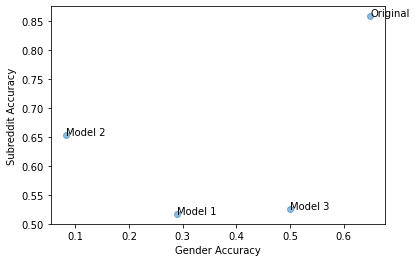

In [454]:
import matplotlib.pyplot as plt

x = [gaccuracy0, gaccuracy1, gaccuracy2, gaccuracy3]
y = [saccuracy0, saccuracy1, saccuracy2, saccuracy3]
n = ["Original", "Model 1", "Model 2", "Model 3"]

plt.xlabel("Gender Accuracy")
plt.ylabel("Subreddit Accuracy")

plt.scatter(x, y, alpha=0.5)
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))
plt.show()